 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

#aapl_path = Path("../Starter_Code/Resources/aapl_historical.csv")
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
#cost_path = Path("../Starter_Code/Resources/cost_historical.csv")
#goog_path = Path("../Starter_Code/Resources/goog_historical.csv")
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
whale_path = Path("../Starter_Code/Resources/whale_returns.csv")


In [3]:
# Count nulls
#algo = pd.read_csv(algo_path, index_col="Date")
#sp500 = pd.read_csv(sp500_path, index_col="Date")
whale = pd.read_csv(whale_path, index_col="Date", parse_dates=True)
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale.dropna(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo = pd.read_csv(algo_path, index_col="Date", parse_dates=True)
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo.dropna(inplace=True)
algo 
algo.isnull().sum()
algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_path, index_col="Date", parse_dates=True)
sp500.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500["Close"] = sp500["Close"].str.replace("$","")
sp500["Close"] = sp500["Close"].astype("float")
sp500.dtypes

C:\Users\miyak\AppData\Local\Temp\ipykernel_2700\4032874680.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$","")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns

#sp500['daily_returns'] = (sp500['Close'] - sp500['Close'].shift(1)) / sp500['Close'].shift(1)
sp500["daily_returns"] = sp500["Close"].pct_change()
sp500 = sp500.dropna()
sp500.head()

,Close,daily_returns
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509


In [12]:
# Drop nulls
sp500.isnull()
# False so no Nulls
sp500.isnull().mean() *100
# 0 % of Nulls
sp500.isnull().sum()
# Sum of Nulls which is o
sp500 = sp500.dropna()
sp500.isnull().sum()

Close            0
daily_returns    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500 = sp500.rename(columns={"Close": "closing price"})
sp500.head()

,closing price,daily_returns
Date,,
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279
2019-04-15,2905.58,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale, algo, sp500], axis='columns', join='inner')
combined_df.sort_index(inplace=True)

# Rename the columns
combined_df.columns = ['SFM', 'P&C', 'TGM', 'BHI', 'Algo 1', 'Algo 2', 'sp500 closing', 'sp500']
combined_df = combined_df.drop(columns=["sp500 closing"])

# All Columns 
combined_df.head(15)

,SFM,P&C,TGM,BHI,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

Date
2015-03-03   -0.001685
2015-03-04   -0.000031
2015-03-05    0.004988
2015-03-06   -0.007629
2015-03-09    0.003158
dtype: float64

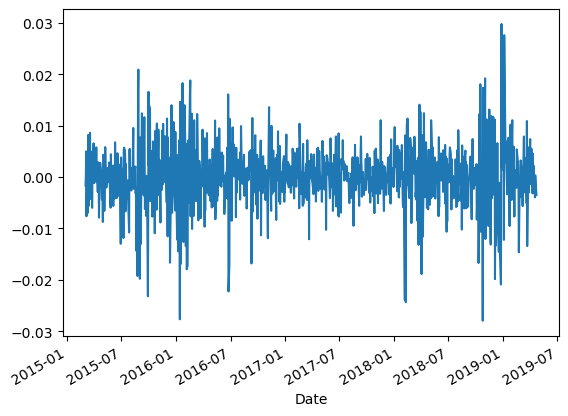

In [15]:
# Plot daily returns of all portfolios

weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]
portfolio_returns = combined_df.dot(weights)
portfolio_returns.plot()
portfolio_returns.head()


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

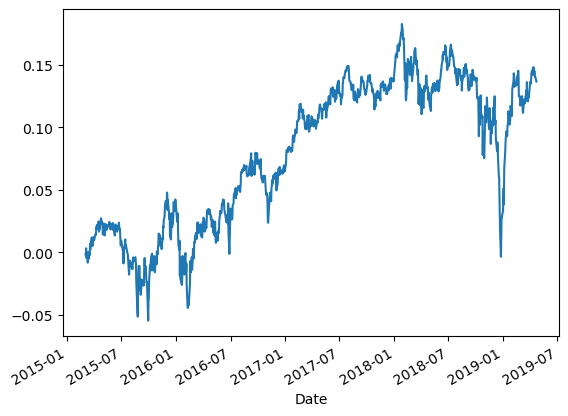

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


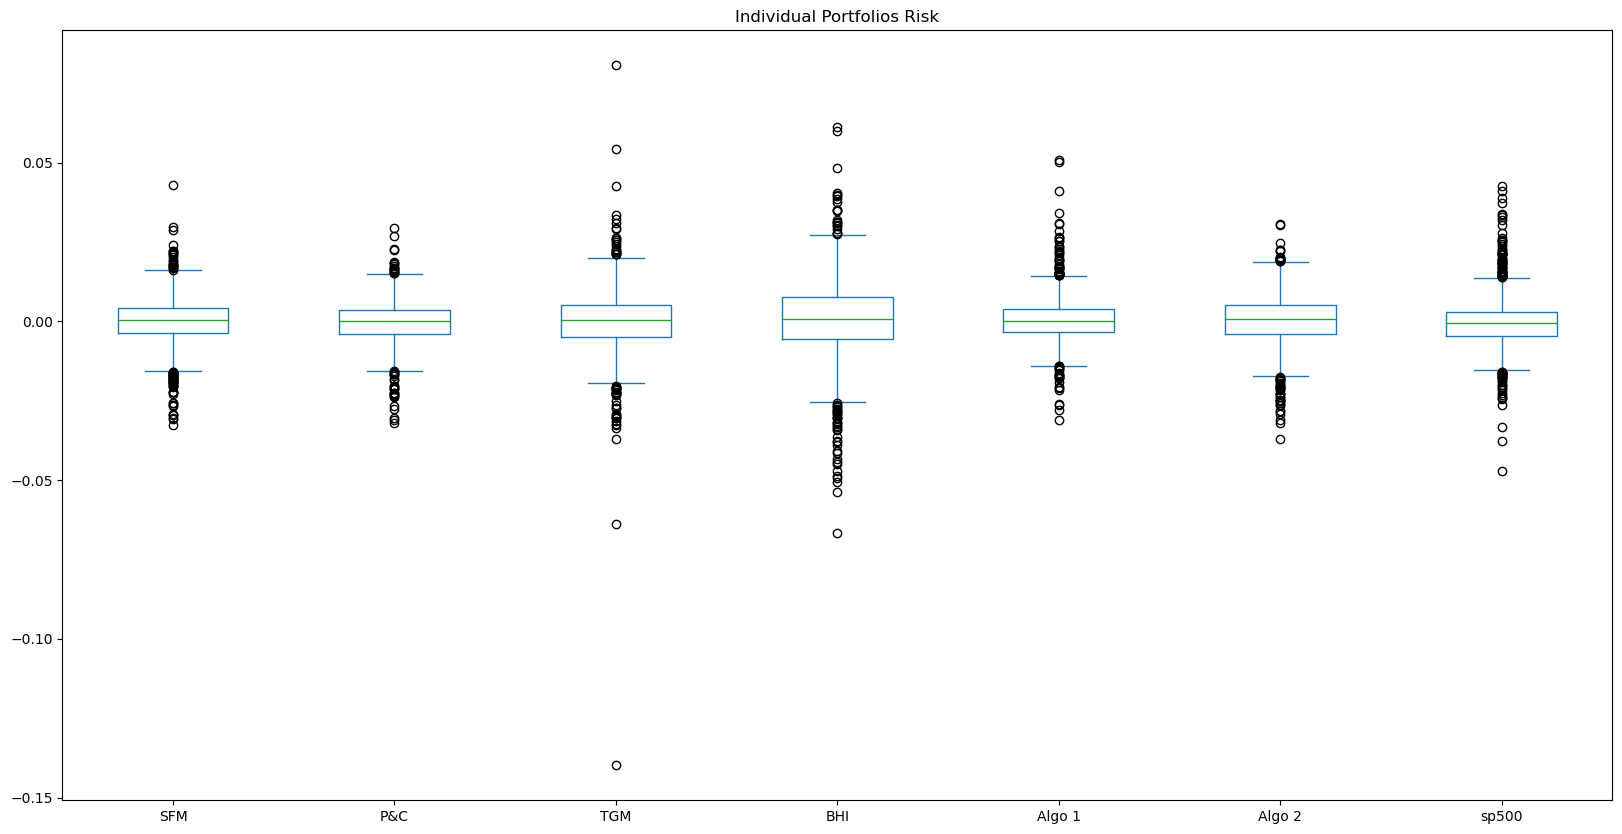

In [17]:
combined_df.plot.box(figsize=(20,10), title="Individual Portfolios Risk");

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SFM       0.007896
P&C       0.007026
TGM       0.010897
BHI       0.012919
Algo 1    0.007623
Algo 2    0.008341
sp500     0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_risk = combined_df["sp500"].std()
# Determine which portfolios are riskier than the S&P 500
combined_df.std() > sp500_risk

SFM       False
P&C       False
TGM        True
BHI        True
Algo 1    False
Algo 2    False
sp500     False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std() * np.sqrt(252)

SFM       0.125348
P&C       0.111527
TGM       0.172989
BHI       0.205079
Algo 1    0.121006
Algo 2    0.132413
sp500     0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

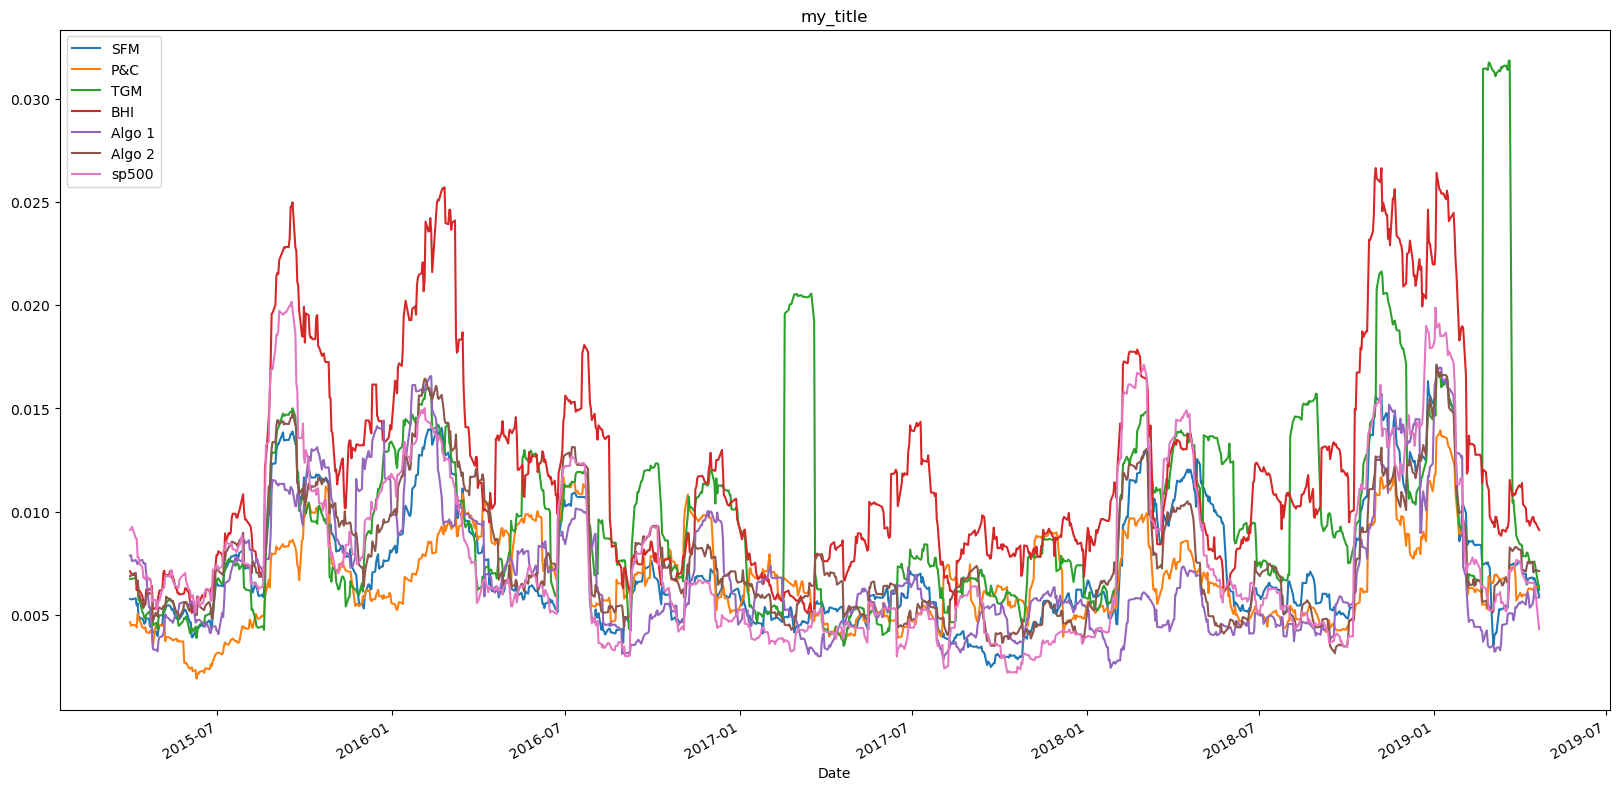

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios_rolling_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_portfolios_rolling_std.plot(figsize=(20,10), title="my_title");

### Calculate and plot the correlation

<Axes: >

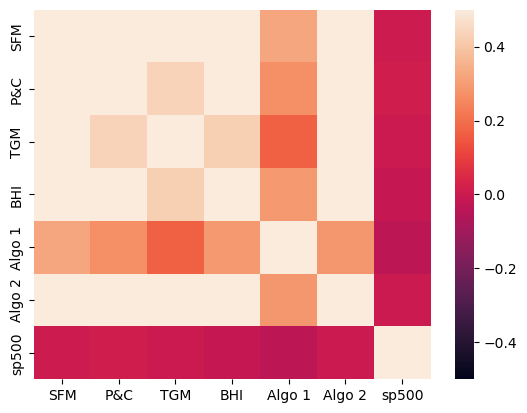

In [22]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix 
sns.heatmap(correlation, vmin=-0.5, vmax=0.5)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

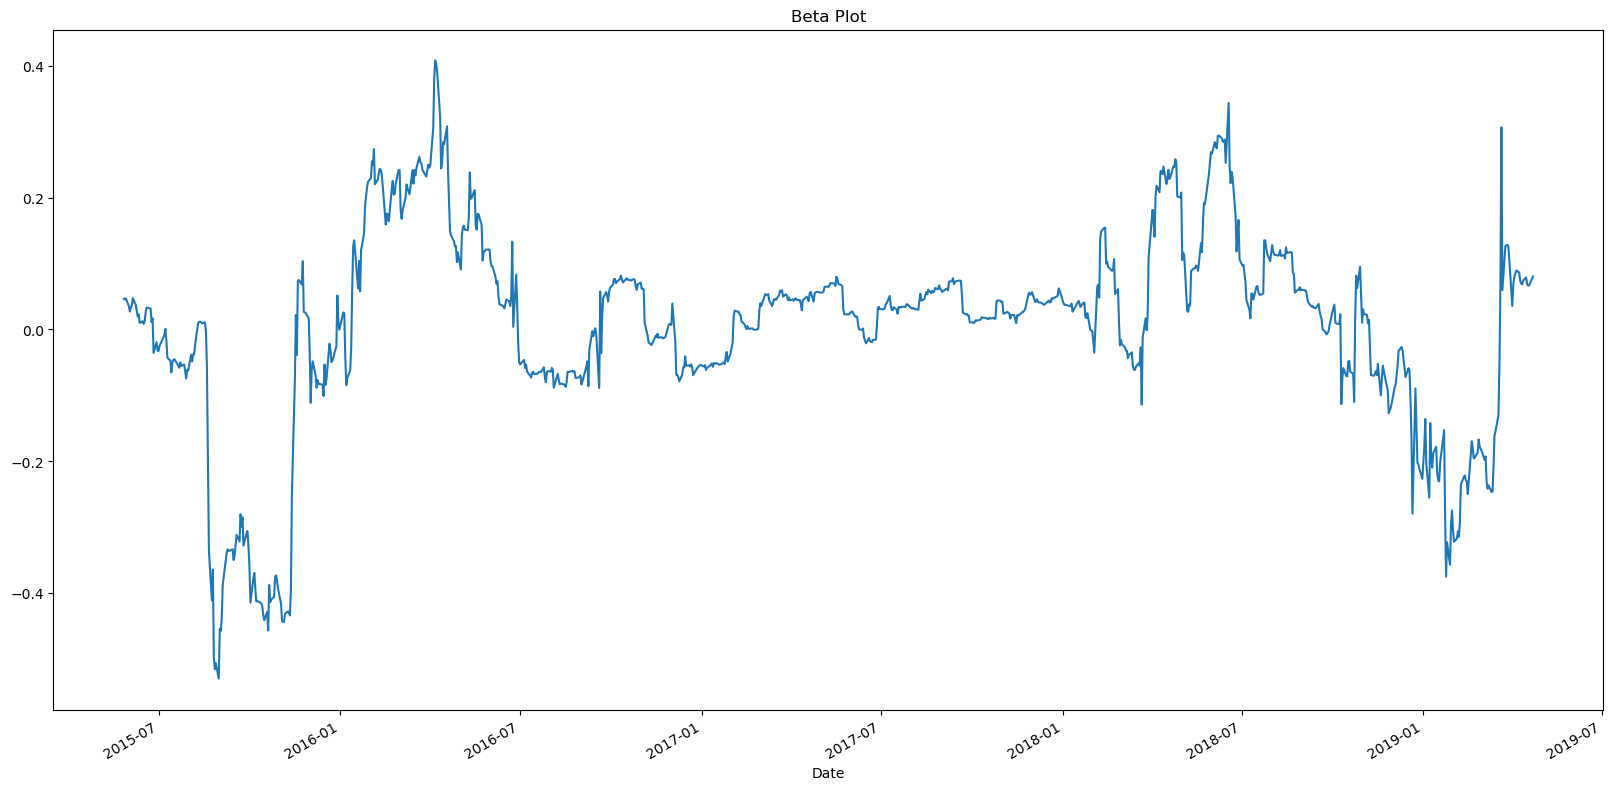

In [24]:
# Calculate covariance of a single portfolio

covariance= combined_df["SFM"].rolling(window=60).cov(combined_df["sp500"])

# Calculate variance of S&P 500
variance = combined_df['sp500'].var()

# Computing beta
sp500_beta = covariance / variance

# Plot beta trend
sp500_beta.plot(figsize=(20,10), title="Beta Plot");

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': '21 days Rolling'}, xlabel='Date'>

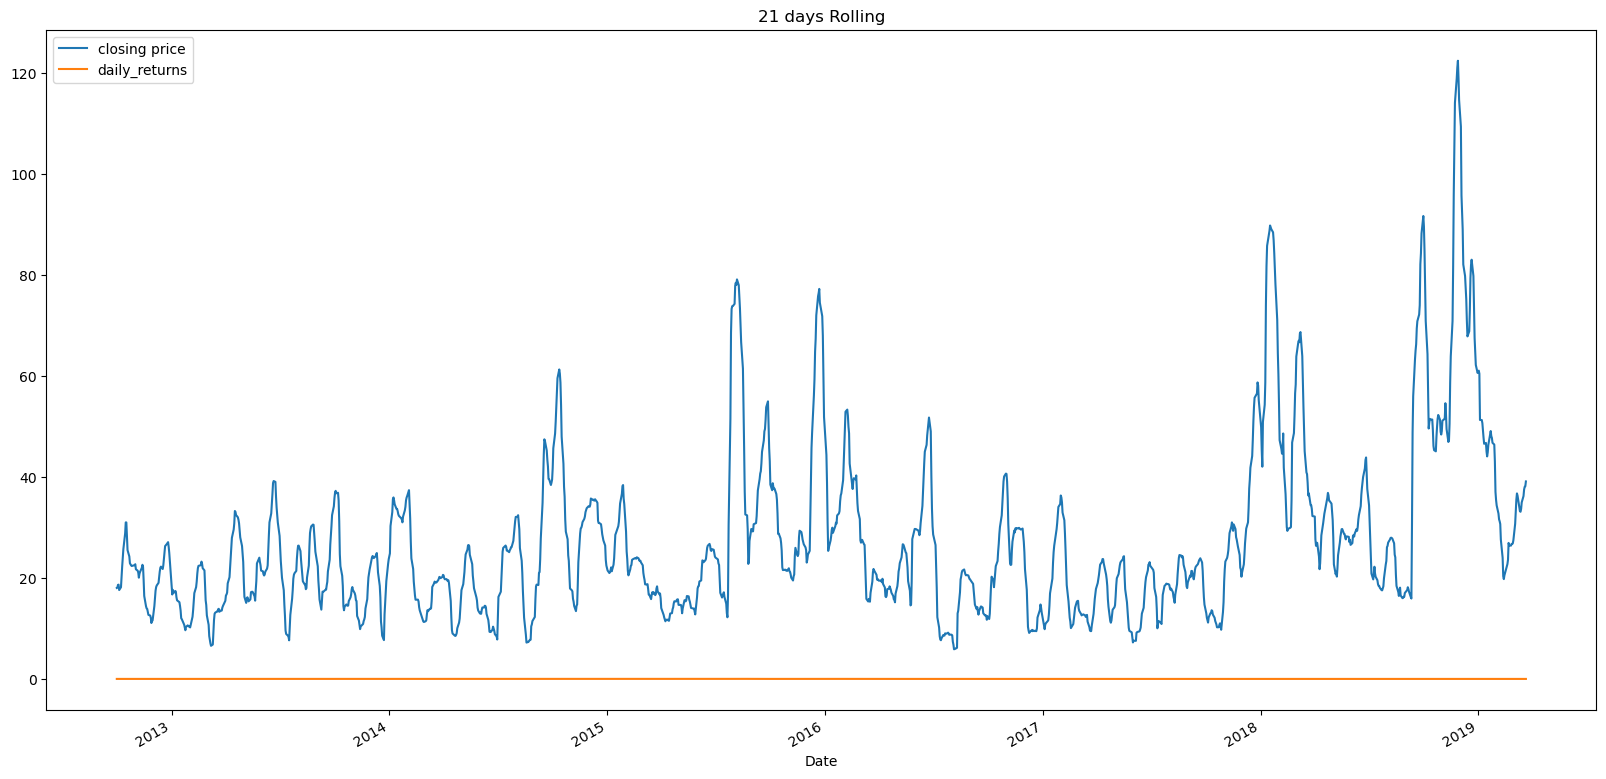

In [25]:
# Use `ewm` to calculate the rolling window
sp500.rolling(window=21).std().plot(figsize=(20,10), title="21 days Rolling")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [75]:
# Annualized Sharpe Ratios
#excess_returns = combined_df.mean(axis=1) - combined_df['sp500']
#annual_excess_returns = excess_returns.mean() * 252
#annual_volatility = excess_returns.std() * np.sqrt(252)
#sharpe_ratio = annual_excess_returns / annual_volatility
#print(sharpe_ratio)
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
print(sharpe_ratios)




SOROS FUND MANAGEMENT LLC        0.359034
PAULSON & CO.INC.               -0.473108
TIGER GLOBAL MANAGEMENT LLC     -0.120425
BERKSHIRE HATHAWAY INC           0.629941
Algo 1                           1.383268
Algo 2                           0.503342
Close                          123.476996
daily_returns                    0.656761
dtype: float64


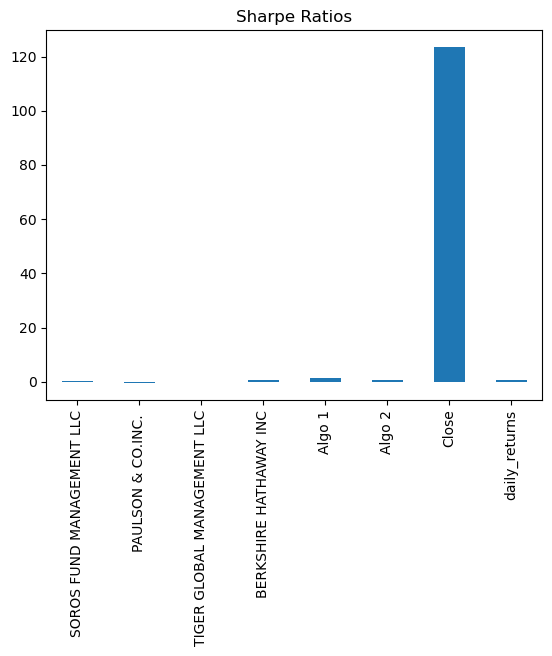

In [76]:
# Visualize the sharpe ratios as a bar plot
#sharpe_ratios.plot(kind="bar", title="sharpe ratios")

sharpe_ratios.plot(kind='bar', title='Sharpe Ratios');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [104]:
# Reading data from 1st stock
algo = pd.read_csv(algo_path, index_col="Date", parse_dates=True)

In [105]:
# Reading data from 2nd stock
sp500 = pd.read_csv(sp500_path, index_col="Date", parse_dates=True)

In [106]:
# Reading data from 3rd stock
whale = pd.read_csv(whale_path, index_col="Date", parse_dates=True)

In [107]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([whale, algo, sp500], axis='columns', join='inner')

In [108]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,$2117.39
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,$2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,$2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,$2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,$2071.26


In [109]:
# Reorganize portfolio data by having a column per symbol

combined_df["Close"] = combined_df["Close"].str.replace("$","")
combined_df["Close"] = combined_df["Close"].astype("float")
combined_df.dtypes



#combined_df = combined_df.drop(columns=["sp500 closing"])

C:\Users\miyak\AppData\Local\Temp\ipykernel_2700\1247407577.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_df["Close"] = combined_df["Close"].str.replace("$","")


SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
Close                          float64
dtype: object

In [110]:
# Calculate daily returns
#combined_df["daily_returns"] = combined_df["Close"].pct_change()
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
print(daily_returns.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-04                  -2.762070           -1.650792   
2015-03-05                   0.800968            0.257544   
2015-03-06                  -2.968465           -1.876837   
2015-03-09                  -1.073656           -2.182252   
2015-03-10                 -18.625495           -2.263954   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-04                     4.113646               -1.641381  3.422374   
2015-03-05                    -1.929234                0.596558 -0.888803   
2015-03-06                    -4.601872               -2.947282  4.190043   
2015-03-09                    -1.688907               -0.873840  0.098917   
2015-03-10                    -3.067380                4.893672 -0.744524   

               Algo 2     Close 

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [112]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

#weights_returns = daily_returns.multiply(weights)
portfolio_returns = daily_returns.sum(axis=1)

# Display sample data
print(portfolio_returns.head())

Date
2015-03-04    -2.067376
2015-03-05    -0.372540
2015-03-06   -11.869501
2015-03-09    -6.829509
2015-03-10   -30.151805
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!